## Exercise 1
---
Determine the effect of stimulus sequence duration on RF estimates. To do this, repeat the above steps for different durations (5 s, 10 s, 20 s, 40 s, 80 s, 160 s, 320 s, 640 s). Compute the Pearson correlation between true and estimated RFs for each duration to quantify the accuracy of the estimator. The Pearson correlation $\mathrm{cc}$ is defined as
$$
\mathrm{cc} = \frac{\mathbf{k}_\mathrm{true}^T \hat{\mathbf{k}}}{\lVert \mathbf{k}_\mathrm{true} \rVert \lVert \hat{\mathbf{k}} \rVert}
$$
where $\lVert \cdot \rVert$ is the L2-norm (vector length).
As the response generation process is stochastic, compute the average correlation across 10 realizations for the same duration and plot the average correlation as a function of duration. How is the recording duration related to the ability to recover the true RF? 

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


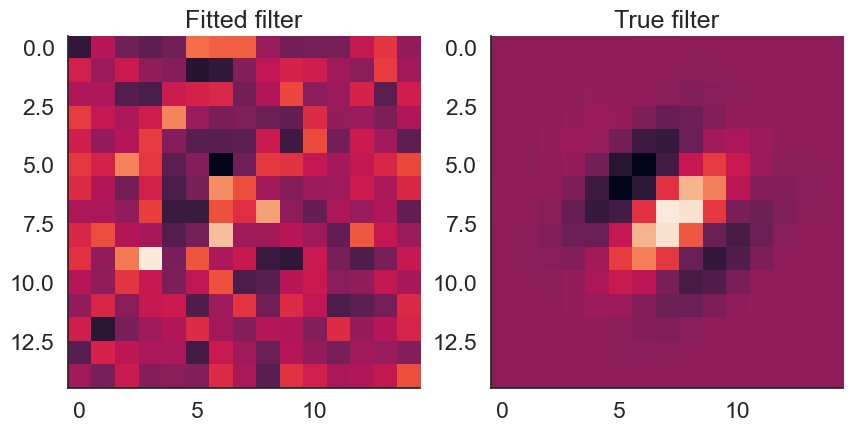

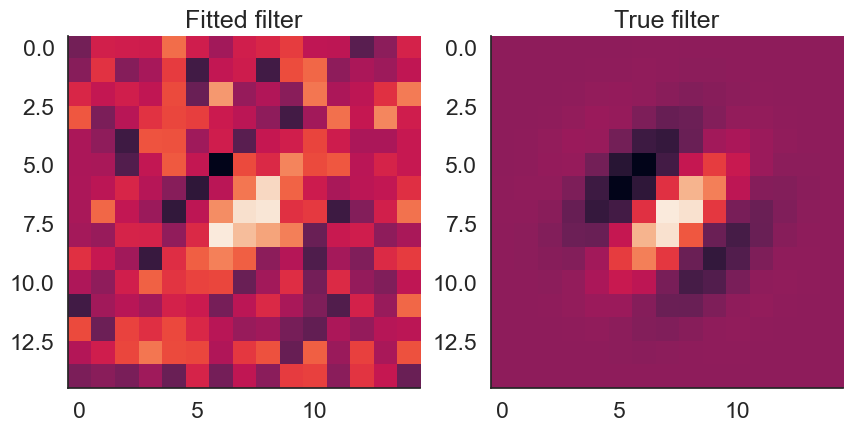

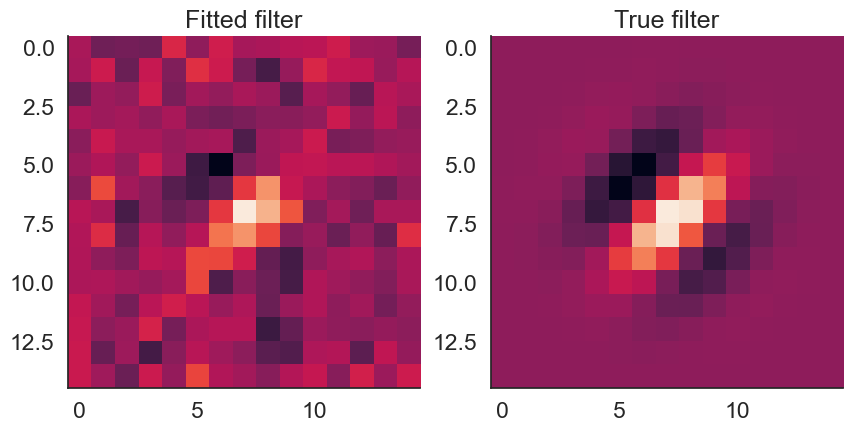

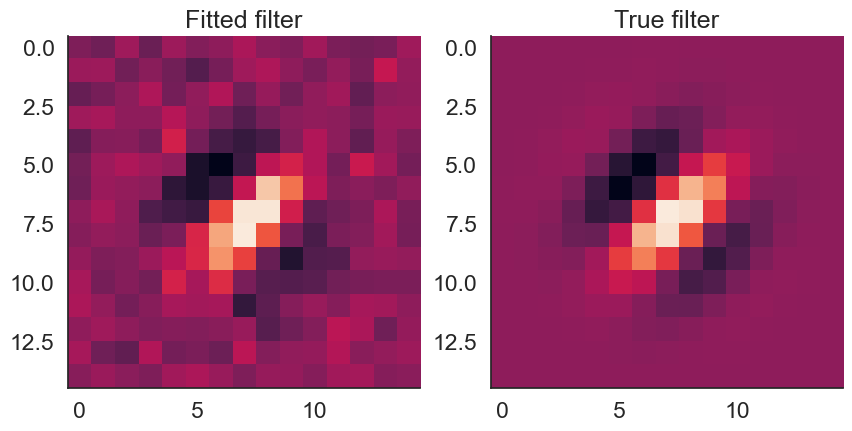

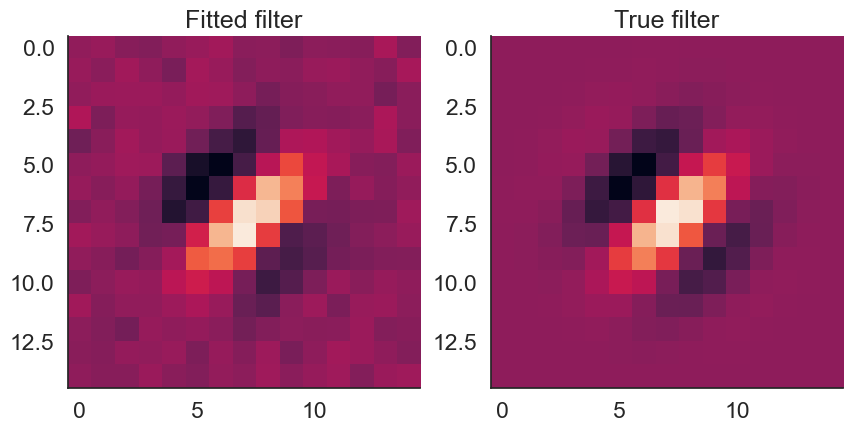

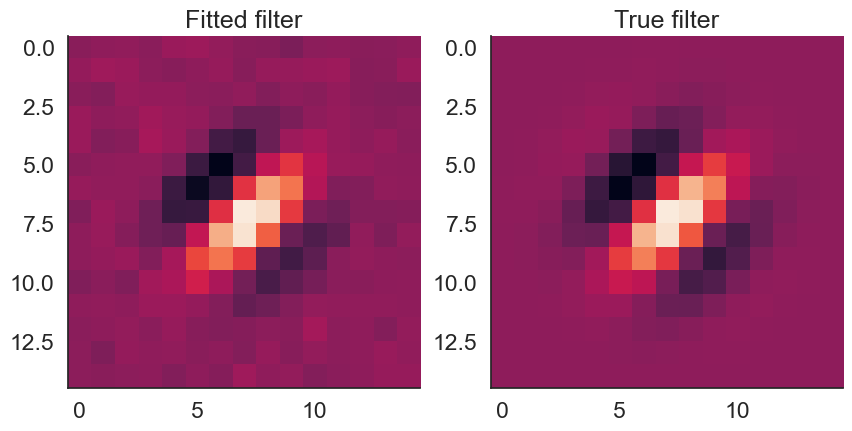

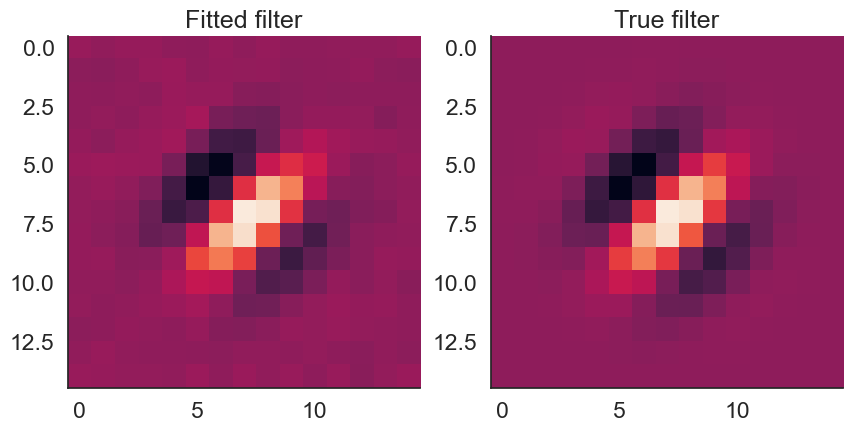

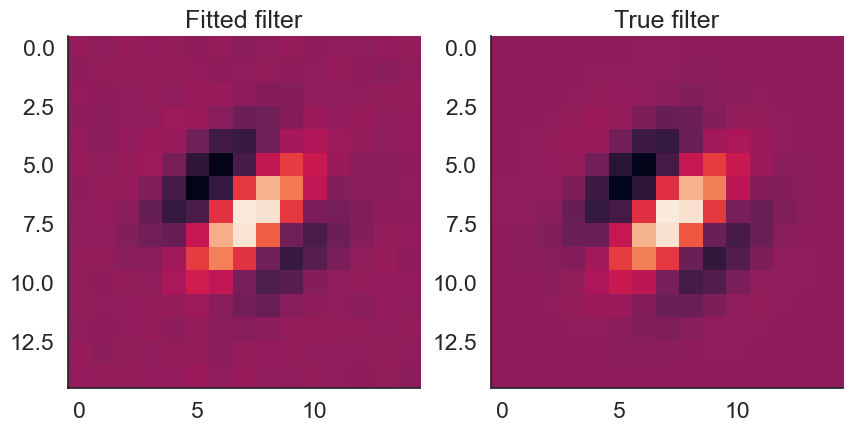

In [55]:

duration_array = [5.,10.,20.,40.,80.,160.,320.,640.]
dt = .1
std_dev = 1
vf_size = (15,15)
cc = np.empty([len(duration_array),vf_size[0],vf_size[1]])
for i in range(len(duration_array)):
    duration = duration_array[i]
    n_bins = round(duration / float(dt))


    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])
    size = vf_size # size in pixel of our receptive field
    mu = (8, 8) # center of the gabor pathc
    sigma = (4,4) #size of the gabor patch
    angle = 45 # orientation of the gabor patch
    frequency = .085 # spatial frequency of the gabor patch
    phase = 0 # pahse of the gabor pathc


    xx, yy = np.meshgrid(1. + np.arange(size[0]),
                             1. + np.arange(size[1]))

    # Gaussian envelope
    G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
                - np.power(yy - mu[1], 2) / (2. * sigma[1]))

    # spatial modulation
    phi = np.deg2rad(angle)
    xxr = xx * np.cos(phi)
    yyr = yy * np.sin(phi)
    xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
    Sn = np.cos(xyr + phase)

    K = G * Sn
    K /= np.amax(np.abs(K))

    #plt.figure(figsize=(20,2))
    #plt.imshow(K)
    #plt.title(r'Receptive field $\bf{k}$')
    #plt.xlabel('x')
    #plt.ylabel('y')
    
    noise_variance = 1
    offset = 2.

    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))

    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)

    # 2. nonlinear stage (for a linear model: f -> identity function)
    rate = ks

    # add Gaussian noise centered around the "true" rate for each bin
    rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)
    
    #S_flat = S_flat.T
    K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
    K_hat = K_hat[:-1].reshape(vf_size)
   
    cc[i,:,:] =  (np.inner(K.T,K_hat)/(np.linalg.norm(K)*np.linalg.norm(K_hat)))

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Fitted filter')
    plt.imshow(K_hat)
    plt.subplot(1,2,2)
    plt.title('True filter')
    plt.imshow(K)

Text(0, 0.5, 'Pearson correlation')

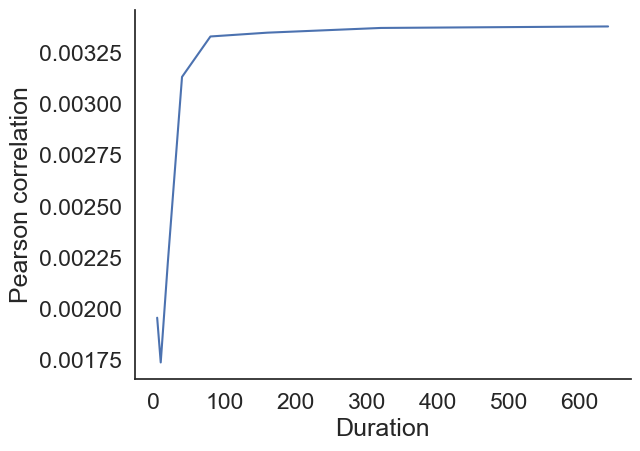

In [56]:

duration_array = [5.,10.,20.,40.,80.,160.,320.,640.]
dt = .1
std_dev = 1
vf_size = (15,15)
cc_dur = np.empty([8,10])
for i in range(len(duration_array)):
    for j in range(10):
        duration = duration_array[i]
        n_bins = round(duration / float(dt))


        S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])
        size = vf_size # size in pixel of our receptive field
        mu = (8, 8) # center of the gabor pathc
        sigma = (4,4) #size of the gabor patch
        angle = 45 # orientation of the gabor patch
        frequency = .085 # spatial frequency of the gabor patch
        phase = 0 # pahse of the gabor pathc


        xx, yy = np.meshgrid(1. + np.arange(size[0]),
                                 1. + np.arange(size[1]))

        # Gaussian envelope
        G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
                    - np.power(yy - mu[1], 2) / (2. * sigma[1]))

        # spatial modulation
        phi = np.deg2rad(angle)
        xxr = xx * np.cos(phi)
        yyr = yy * np.sin(phi)
        xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
        Sn = np.cos(xyr + phase)

        K = G * Sn
        K /= np.amax(np.abs(K))

        noise_variance = 1
        offset = 2.

        # flatten the matrices in to 1d array for convenience
        K_flat = K.ravel()
        K_flat = np.hstack((K.flat, offset))

        S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
        S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


        # 1. linear stage
        ks = np.dot(K_flat, S_flat.T)

        # 2. nonlinear stage (for a linear model: f -> identity function)
        rate = ks

        # add Gaussian noise centered around the "true" rate for each bin
        rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)

        #S_flat = S_flat.T
        K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
        K_hat = K_hat[:-1].reshape(vf_size)
        
        cc = (np.inner(K.T,K_hat)/(np.linalg.norm(K)*np.linalg.norm(K_hat)))
        cc = np.mean(cc)
        cc_dur[i,j] = cc
        
average_cc = np.mean(cc_dur,axis=1)
        
plt.figure()
plt.plot(duration_array,average_cc)
plt.xlabel('Duration')
plt.ylabel('Pearson correlation')

The optimal duration for a better RF estimation is above 100 as can be appreciated in the figure. 

## Exercise 2
---
Determine the effect of response noise ($\sigma^2$) on RF estimates. Try different value for the noise variance in the simulations, e.g., 0, 2, 4, 6, 8, and 10 for a duration of 100 s. As in the previous excercise, repeatedly estimate RF parameters for each condition (10 times) but this time also plot the standard deviation of the correlations across the different runs for each condition.

Text(0, 0.5, 'Pearson correlation')

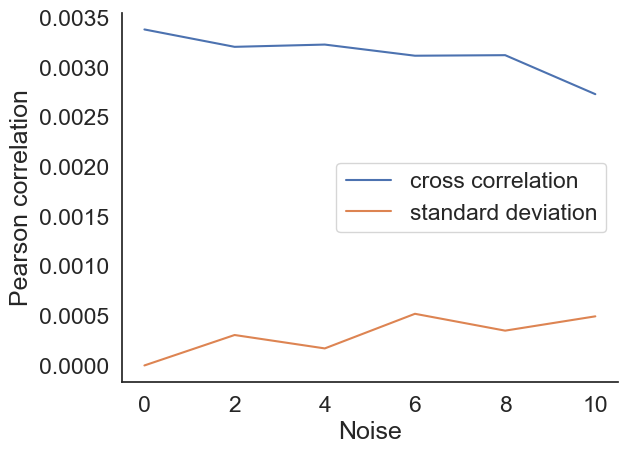

In [57]:

noise_array = [0.,2.,4.,6.,8.,10.]
duration = 100.
dt = .1
std_dev = 1
vf_size = (15,15)
cc_dur = np.empty([6,10])
st_dev = np.empty([6,10])
for i in range(len(noise_array)):
    for j in range(10):

        n_bins = round(duration / float(dt))


        S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])
        size = vf_size # size in pixel of our receptive field
        mu = (8, 8) # center of the gabor pathc
        sigma = (4,4) #size of the gabor patch
        angle = 45 # orientation of the gabor patch
        frequency = .085 # spatial frequency of the gabor patch
        phase = 0 # pahse of the gabor pathc


        xx, yy = np.meshgrid(1. + np.arange(size[0]),
                                 1. + np.arange(size[1]))

        # Gaussian envelope
        G = np.exp(- np.power(xx - mu[0], 2) / (2. * sigma[0])
                    - np.power(yy - mu[1], 2) / (2. * sigma[1]))

        # spatial modulation
        phi = np.deg2rad(angle)
        xxr = xx * np.cos(phi)
        yyr = yy * np.sin(phi)
        xyr = (xxr + yyr) * 2. * np.pi * 2. * frequency
        Sn = np.cos(xyr + phase)

        K = G * Sn
        K /= np.amax(np.abs(K))

        noise_variance = noise_array[i]
        offset = 2.

        # flatten the matrices in to 1d array for convenience
        K_flat = K.ravel()
        K_flat = np.hstack((K.flat, offset))

        S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
        S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


        # 1. linear stage
        ks = np.dot(K_flat, S_flat.T)

        # 2. nonlinear stage (for a linear model: f -> identity function)
        rate = ks

        # add Gaussian noise centered around the "true" rate for each bin
        rate = rate + np.sqrt(noise_variance) * np.random.randn(n_bins)

        #S_flat = S_flat.T
        K_hat = np.linalg.pinv(S_flat.T @ S_flat) @ (S_flat.T @ rate)
        K_hat = K_hat[:-1].reshape(vf_size)
        
        cc = (np.inner(K.T,K_hat)/(np.linalg.norm(K)*np.linalg.norm(K_hat)))
        cc = np.mean(cc)
        cc_dur[i,j] = cc
        
average_cc = np.mean(cc_dur,axis=1)
st_dev = np.std(cc_dur,axis=1)
        
plt.figure()
plt.plot(noise_array,average_cc,label='cross correlation')
plt.plot(noise_array,st_dev,label='standard deviation')
plt.legend()
plt.xlabel('Noise')
plt.ylabel('Pearson correlation')

## Exercise 5
---
Explore the effect of the data duration and the firing rate on the goodness of fit of the Poisson GLM.

A - Generate data with durations of 10,20,50,100 and 200 seconds. Fit the model on each dataset and plot the fitted parameters.
Use the pearson correlation as a proxy of the goodness of fit, and plot it as a function of the duration of the data.



average spike rate: 4.60 spikes per second
Pearson correlation = 0.156
average spike rate: 5.00 spikes per second
Pearson correlation = 0.293
average spike rate: 4.74 spikes per second
Pearson correlation = 0.627
average spike rate: 4.60 spikes per second
Pearson correlation = 0.708
average spike rate: 4.64 spikes per second
Pearson correlation = 0.912


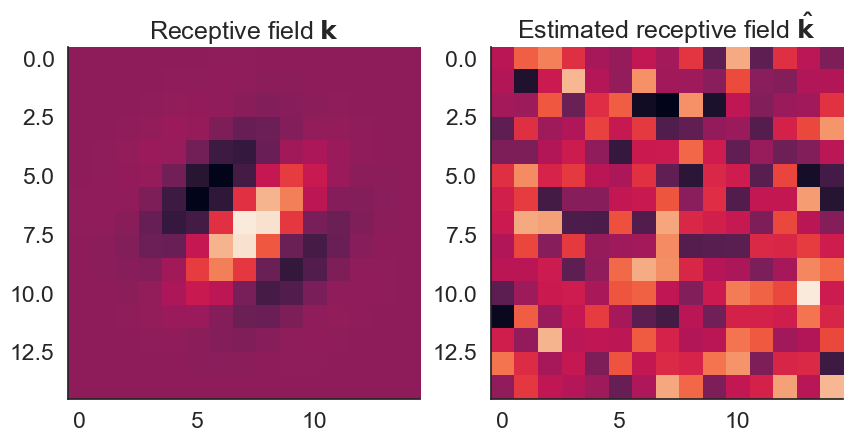

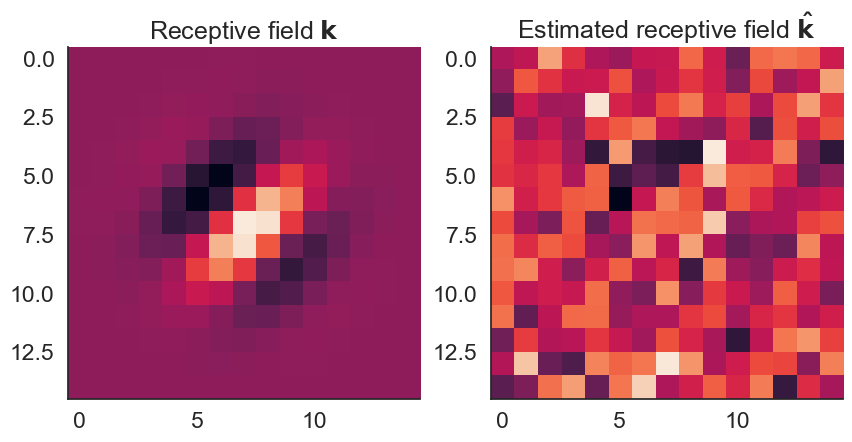

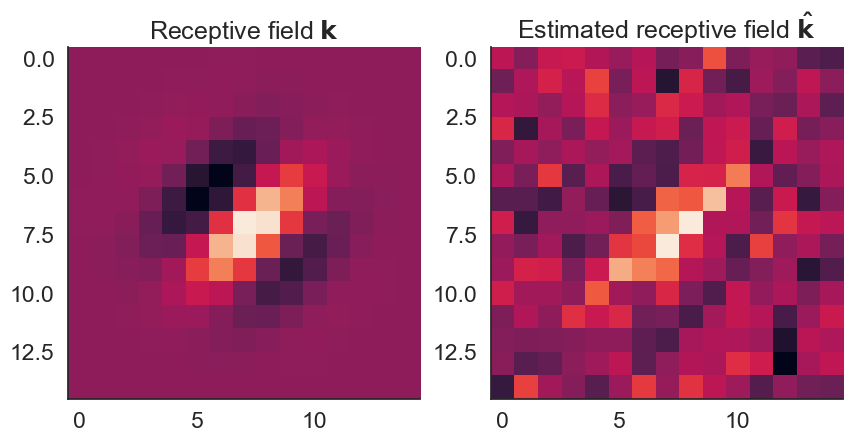

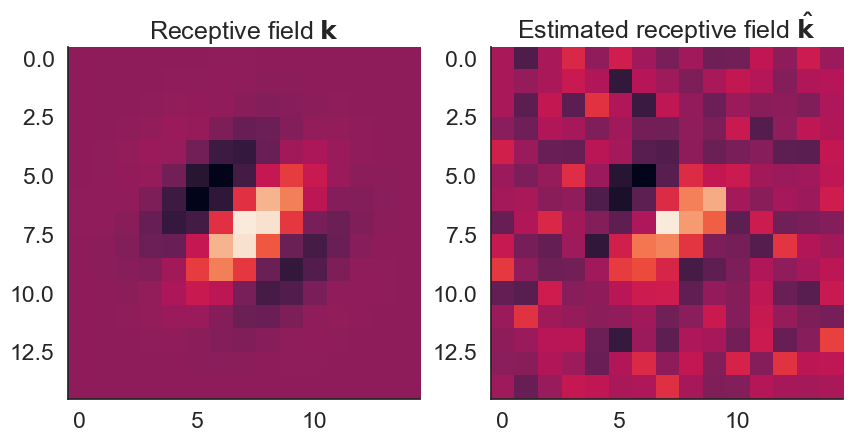

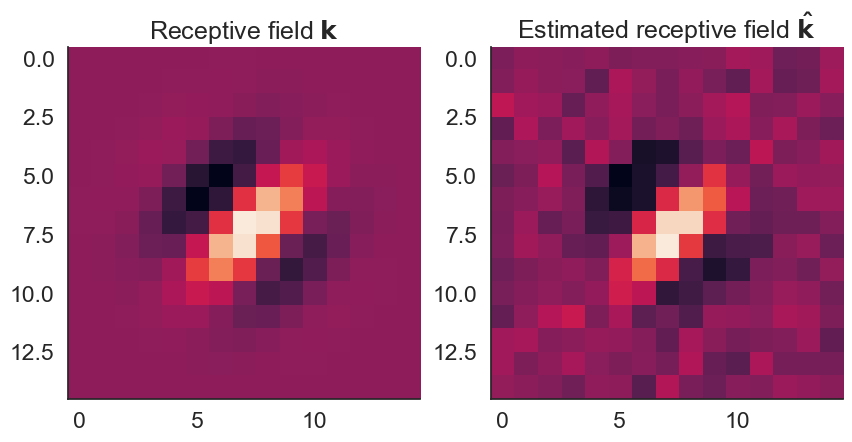

In [58]:
# genration of the stimulus 
duration_array = [10.,20.,50.,100.,200.]
P_correlation = np.empty([len(duration_array)])
for i in range(len(duration_array)):
    
    duration = duration_array[i]
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    n_bins = round(duration / float(dt))


    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

    def generate_inhomogeneous_poisson_spikes(lamda, dt):

        n_bins = lamda.shape[0]
        bins = np.arange(n_bins+1)*dt

        # generate Poisson distributed numbers for all bins with the max. intensity (lamda_max)
        lamda_max = np.max(lamda)
        poisson_numbers = np.random.poisson(lamda_max, size=n_bins)

        # throw away numbers depending on the actual intensity ("thinning")
        spike_times = []
        prob = lamda / lamda_max
        for i in range(n_bins):

            # number of spikes to keep in this bin
            n = np.sum(np.random.rand(poisson_numbers[i]) < prob[i])
            n_s = int(round(n * dt))

            # generate random spike times in this bin
            ts = bins[i] + np.random.rand(n_s)*dt

            spike_times.extend(ts)

        return np.asarray(spike_times)

    spike_rate = 5 # average firing rate 

    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))

    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)

    # 2. nonlinear stage (for a linear model: f -> identity function)
    lamda = np.exp(ks)

    # lamda * dt is the number of spikes in the different bins (but keep in mind that the Poisson process
    # is a stochastic process so the actual number will differ for every draw). Thus, the sum of the product 
    # across all bins gives the expected number of spikes for the whole draw.
    expected_rate = np.sum(lamda*dt) / duration
    lamda *= (spike_rate / expected_rate)

    # generate spike times using an inhomogeneous Poisson process
    spike_times = generate_inhomogeneous_poisson_spikes(lamda, dt)

    # compute spike counts in the different time bins
    spike_counts = np.histogram(spike_times,
                                bins=np.arange(n_bins+1)*dt)[0]

    print("average spike rate: %0.2f spikes per second" % (len(spike_times) / duration))
    
    from scipy.optimize import minimize

    # define functions for minimisation
    def cost(k, spike_counts, S,alpha=1):
        #negative loglikelihood function to minimize
        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(spike_counts, ks) + dt * np.sum(lamda)


    def grad(k, spike_counts, S):
        # expression of the gradient of the negative log likelihood (note the sign is flipped accordingly)

        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(S.T, spike_counts - dt*lamda)

    k_STA = np.inner(S_flat.T, spike_counts) / np.sum(spike_counts)
    res = minimize(fun = cost, x0 = k_STA / 10, args = (spike_counts, S_flat), method = 'Newton-CG', jac = grad)

    K_est = res.x
    P_correlation[i] = np.inner(K.ravel(), K_est[:-1]) / (np.linalg.norm(K.ravel()) * np.linalg.norm(K_est[:-1]))

    print("Pearson correlation = {:.3f}".format(np.inner(K.ravel(), K_est[:-1]) / (np.linalg.norm(K.ravel()) * np.linalg.norm(K_est[:-1]))))

    # show result
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title(r'Receptive field $\mathbf{k}$')
    plt.imshow(K)

    plt.subplot(1,2,2)
    plt.title(r'Estimated receptive field $\mathbf{\hat{k}}$')
    plt.imshow(K_est[:-1].reshape(15, 15)) 



Text(0, 0.5, 'Pearson correlation')

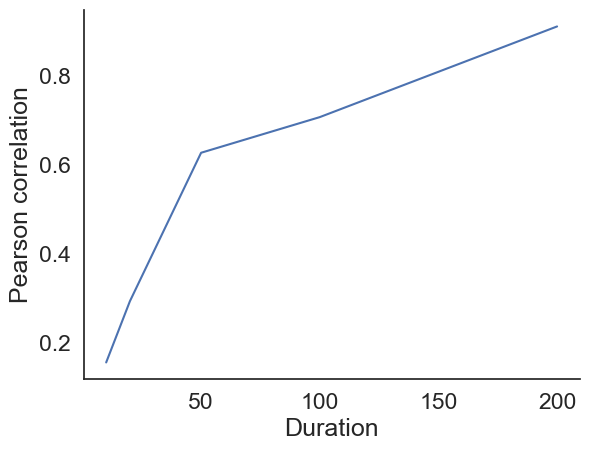

In [59]:
plt.figure()
plt.plot(duration_array,P_correlation)
plt.xlabel('Duration')
plt.ylabel('Pearson correlation')

B - Fix the duration to 100s, and change the average firing rate of the simulation. How does the fit perform for different firing rates? 

average spike rate: 0.85 spikes per second
Pearson correlation = 0.563
average spike rate: 1.81 spikes per second
Pearson correlation = 0.733
average spike rate: 49.31 spikes per second
Pearson correlation = 0.968
average spike rate: 9.63 spikes per second
Pearson correlation = 0.770
average spike rate: 19.38 spikes per second
Pearson correlation = 0.866


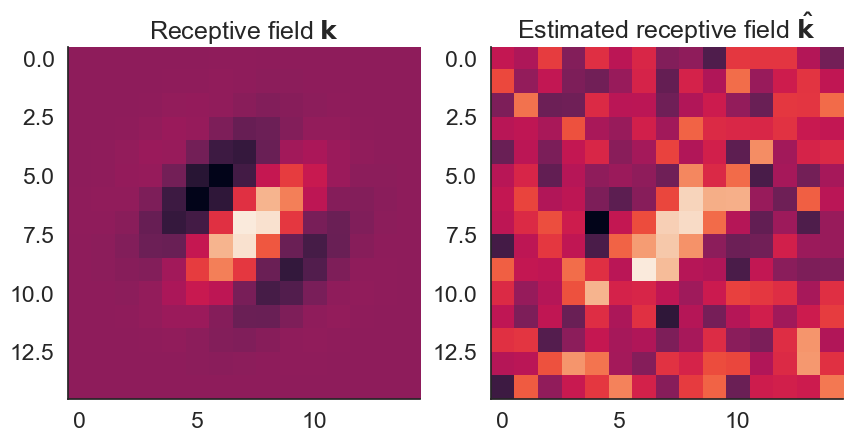

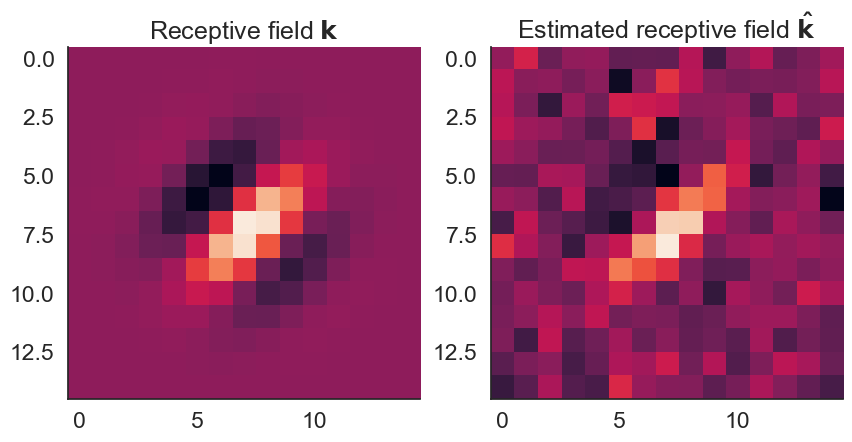

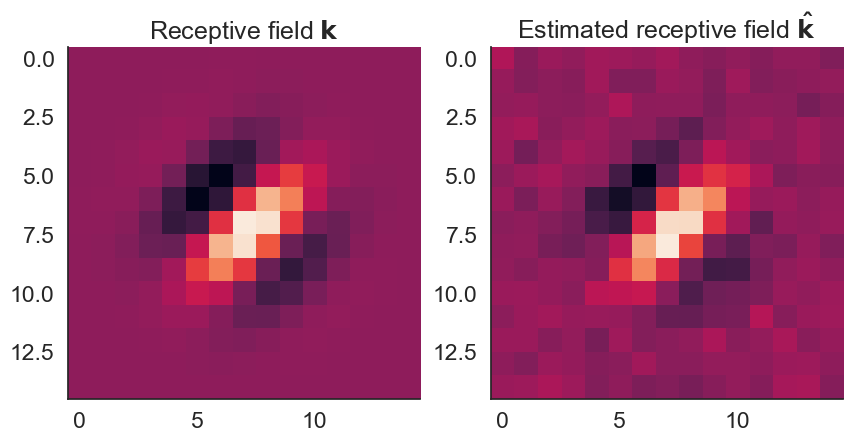

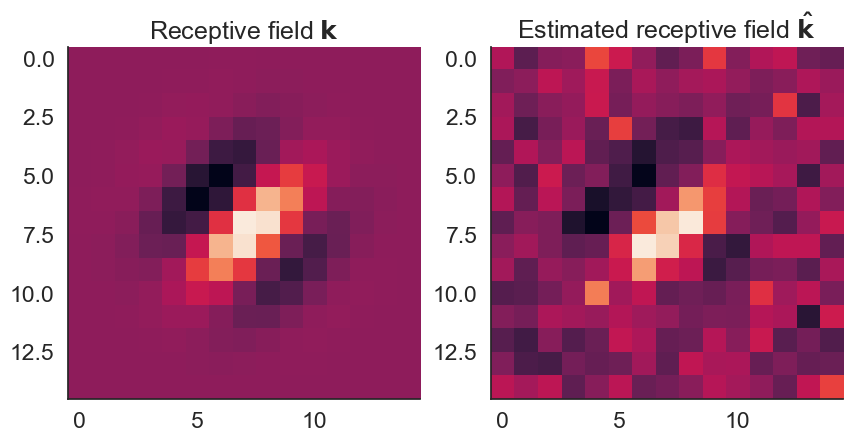

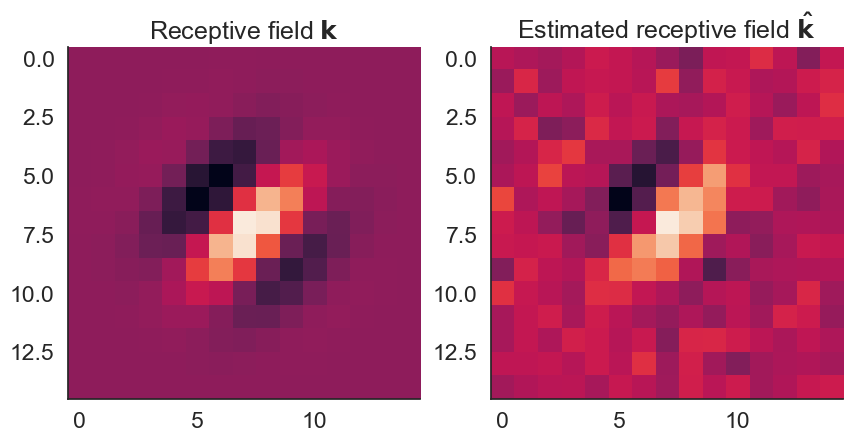

In [60]:
# genration of the stimulus 
spike_rate_array = [1.,2.,50.,10.,20.]
P_correlation = np.empty([len(duration_array)])
for i in range(len(duration_array)):
    
    duration = 100.
    dt = .1
    std_dev = 1
    vf_size = (15,15)
    n_bins = round(duration / float(dt))


    S = std_dev * np.random.randn(n_bins,vf_size[0],vf_size[1])

    def generate_inhomogeneous_poisson_spikes(lamda, dt):

        n_bins = lamda.shape[0]
        bins = np.arange(n_bins+1)*dt

        # generate Poisson distributed numbers for all bins with the max. intensity (lamda_max)
        lamda_max = np.max(lamda)
        poisson_numbers = np.random.poisson(lamda_max, size=n_bins)

        # throw away numbers depending on the actual intensity ("thinning")
        spike_times = []
        prob = lamda / lamda_max
        for i in range(n_bins):

            # number of spikes to keep in this bin
            n = np.sum(np.random.rand(poisson_numbers[i]) < prob[i])
            n_s = int(round(n * dt))

            # generate random spike times in this bin
            ts = bins[i] + np.random.rand(n_s)*dt

            spike_times.extend(ts)

        return np.asarray(spike_times)

    spike_rate = spike_rate_array[i] # average firing rate 

    # flatten the matrices in to 1d array for convenience
    K_flat = K.ravel()
    K_flat = np.hstack((K.flat, offset))

    S_flat = S.reshape(S.shape[0],S.shape[1]*S.shape[2])
    S_flat = np.hstack((S_flat, np.ones((n_bins, 1))))


    # 1. linear stage
    ks = np.dot(K_flat, S_flat.T)

    # 2. nonlinear stage (for a linear model: f -> identity function)
    lamda = np.exp(ks)

    # lamda * dt is the number of spikes in the different bins (but keep in mind that the Poisson process
    # is a stochastic process so the actual number will differ for every draw). Thus, the sum of the product 
    # across all bins gives the expected number of spikes for the whole draw.
    expected_rate = np.sum(lamda*dt) / duration
    lamda *= (spike_rate / expected_rate)

    # generate spike times using an inhomogeneous Poisson process
    spike_times = generate_inhomogeneous_poisson_spikes(lamda, dt)

    # compute spike counts in the different time bins
    spike_counts = np.histogram(spike_times,
                                bins=np.arange(n_bins+1)*dt)[0]

    print("average spike rate: %0.2f spikes per second" % (len(spike_times) / duration))
    
    from scipy.optimize import minimize

    # define functions for minimisation
    def cost(k, spike_counts, S,alpha=1):
        #negative loglikelihood function to minimize
        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(spike_counts, ks) + dt * np.sum(lamda)


    def grad(k, spike_counts, S):
        # expression of the gradient of the negative log likelihood (note the sign is flipped accordingly)

        ks = np.dot(k, S.T)
        lamda = np.exp(ks)
        return -np.dot(S.T, spike_counts - dt*lamda)

    k_STA = np.inner(S_flat.T, spike_counts) / np.sum(spike_counts)
    res = minimize(fun = cost, x0 = k_STA / 10, args = (spike_counts, S_flat), method = 'Newton-CG', jac = grad)

    K_est = res.x
    P_correlation[i] = np.inner(K.ravel(), K_est[:-1]) / (np.linalg.norm(K.ravel()) * np.linalg.norm(K_est[:-1]))

    print("Pearson correlation = {:.3f}".format(np.inner(K.ravel(), K_est[:-1]) / (np.linalg.norm(K.ravel()) * np.linalg.norm(K_est[:-1]))))

    # show result
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title(r'Receptive field $\mathbf{k}$')
    plt.imshow(K)

    plt.subplot(1,2,2)
    plt.title(r'Estimated receptive field $\mathbf{\hat{k}}$')
    plt.imshow(K_est[:-1].reshape(15, 15)) 



Text(0, 0.5, 'Pearson correlation')

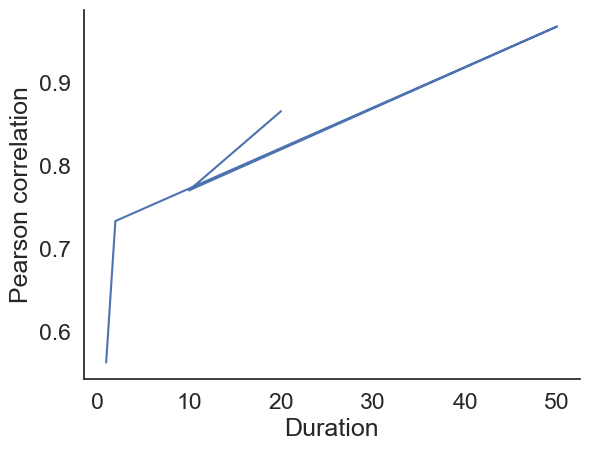

In [62]:
plt.figure()
plt.plot(spike_rate_array,P_correlation)
plt.xlabel('Firing rate')
plt.ylabel('Pearson correlation')